In [1]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("placement_reorder.csv")
from univariate import univariate
quan,qual =univariate.quanqual(dataset)

In [2]:
univariate = {}
for column in quan:
    univariate[column] = {
        "Mean": round(dataset[column].mean()),
        "Median": round(dataset[column].median()),
        "Mode": round(dataset[column].mode()[0]) if not dataset[column].mode().empty else None,
        # "Q1:25%":np.percentile(dataset[column],25)
        "Q1:25%":round(dataset.describe()[column]["25%"]),
        "Q2:50%":round(dataset.describe()[column]["50%"]),
        "Q3:75%":round(dataset.describe()[column]["75%"]),
        "Q4:100%":round(dataset.describe()[column]["max"]) 
    }
univariate_df = pd.DataFrame(univariate)
univariate_df = univariate_df.reindex(["Mean", "Median", "Mode", "Q1:25%", "Q2:50%", "Q3:75%", "Q4:100%"])
print(univariate_df)


         sl_no  ssc_p  hsc_p  degree_p  etest_p  mba_p  salary
Mean       108     67     66        66       72     62  288655
Median     108     67     65        66       71     62  265000
Mode         1     62     63        65       60     57  300000
Q1:25%      54     61     61        61       60     58  240000
Q2:50%     108     67     65        66       71     62  265000
Q3:75%     162     76     73        72       84     66  300000
Q4:100%    215     89     98        91       98     78  940000


In [3]:
univariate = {}
for column in quan:
    s = pd.to_numeric(dataset[column], errors="coerce").dropna()

    q1 = s.quantile(0.25)
    q2 = s.quantile(0.50)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    univariate[column]={
        "Mean": round(s.mean()),
        "Median": round(s.median()),
        "Mode": round(s.mode()[0]) if not s.mode().empty else None,
        "Q1:25%": round(q1),
        "Q2:50%": round(q2),
        "Q3:75%": round(q3),
        "Q4:100%": round(s.max()),
        "IQR": round(iqr, 3),
        "Lower_Fence": round(lower, 3),
        "Upper_Fence": round(upper, 3),
        "Min":s.min(),
        "Max":s.max()
    }
univariate_df = pd.DataFrame(univariate)
univariate_df = univariate_df.reindex(["Mean", "Median", "Mode", "Q1:25%", "Q2:50%", "Q3:75%", "Q4:100%", "IQR","Lower_Fence", "Upper_Fence","Min","Max"])
print(univariate_df)

             sl_no  ssc_p  hsc_p  degree_p  etest_p  mba_p    salary
Mean         108.0  67.00  66.00      66.0    72.00  62.00  288655.0
Median       108.0  67.00  65.00      66.0    71.00  62.00  265000.0
Mode           1.0  62.00  63.00      65.0    60.00  57.00  300000.0
Q1:25%        54.0  61.00  61.00      61.0    60.00  58.00  240000.0
Q2:50%       108.0  67.00  65.00      66.0    71.00  62.00  265000.0
Q3:75%       162.0  76.00  73.00      72.0    84.00  66.00  300000.0
Q4:100%      215.0  89.00  98.00      91.0    98.00  78.00  940000.0
IQR          107.0  15.10  12.10      11.0    23.50   8.31   60000.0
Lower_Fence -106.0  37.95  42.75      44.5    24.75  45.48  150000.0
Upper_Fence  322.0  98.35  91.15      88.5   118.75  78.72  390000.0
Min            1.0  40.89  37.00      50.0    50.00  51.21  200000.0
Max          215.0  89.40  97.70      91.0    98.00  77.89  940000.0


In [25]:
univariate_df["hsc_p"]["Min"]>+univariate_df["hsc_p"]["Lower_Fence"]

np.False_

In [4]:
#find out the outliers in the  given column
Lower_Fence=[]
Upper_Fence=[]
for column in quan:
    if univariate[column]["Min"]<univariate[column]["Lower_Fence"]:
       Lower_Fence.append(column)
    if univariate[column]["Max"]>univariate[column]["Upper_Fence"]:
        Upper_Fence.append(column)

In [5]:
Lower_Fence

['hsc_p']

In [6]:
Upper_Fence

['hsc_p', 'degree_p', 'salary']

In [7]:
# Make a copy so original dataset is safe
df_winsorized = dataset.copy()

for column in quan:
    lower = univariate[column]["Lower_Fence"]
    upper = univariate[column]["Upper_Fence"]
    
    #Looks for all rows where the column value is less than the lower fence.
    # replace lower outliers with lower fence
    df_winsorized.loc[df_winsorized[column] < lower, column] = lower

    # replace upper outliers with upper fence
    df_winsorized.loc[df_winsorized[column] > upper, column] = upper

print("Outliers have been capped at fences!")


Outliers have been capped at fences!


In [11]:
df_winsorized

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4,56.00,52.00,52.00,66.0,59.43,NaN,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5,85.80,73.60,73.30,96.8,55.50,390000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,390000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [4]:
dataset=df_winsorized.copy()

NameError: name 'df_winsorized' is not defined

In [5]:
univariate = {}
for column in quan:
    s = pd.to_numeric(dataset[column], errors="coerce").dropna()

    q1 = s.quantile(0.25)
    q2 = s.quantile(0.50)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    univariate[column]={
        "Mean": round(s.mean()),
        "Median": round(s.median()),
        "Mode": round(s.mode()[0]) if not s.mode().empty else None,
        "Q1:25%": round(q1),
        "Q2:50%": round(q2),
        "Q3:75%": round(q3),
        "Q4:100%": round(s.max()),
        "IQR": round(iqr, 3),
        "Lower_Fence": round(lower, 3),
        "Upper_Fence": round(upper, 3),
        "Min":s.min(),
        "Max":s.max(),
        "kurtosis":s.kurtosis(),
        "skew":s.skew()
    }
univariate_df = pd.DataFrame(univariate)
univariate_df = univariate_df.reindex(["Mean", "Median", "Mode", "Q1:25%", "Q2:50%", "Q3:75%", "Q4:100%", "IQR","Lower_Fence", "Upper_Fence","Min","Max",
                                      "kurtosis","skew"])
univariate_df = univariate_df.round(2)
print(univariate_df)

             sl_no  ssc_p  hsc_p  degree_p  etest_p  mba_p     salary
Mean         108.0  67.00  66.00     66.00    72.00  62.00  288655.00
Median       108.0  67.00  65.00     66.00    71.00  62.00  265000.00
Mode           1.0  62.00  63.00     65.00    60.00  57.00  300000.00
Q1:25%        54.0  61.00  61.00     61.00    60.00  58.00  240000.00
Q2:50%       108.0  67.00  65.00     66.00    71.00  62.00  265000.00
Q3:75%       162.0  76.00  73.00     72.00    84.00  66.00  300000.00
Q4:100%      215.0  89.00  98.00     91.00    98.00  78.00  940000.00
IQR          107.0  15.10  12.10     11.00    23.50   8.31   60000.00
Lower_Fence -106.0  37.95  42.75     44.50    24.75  45.48  150000.00
Upper_Fence  322.0  98.35  91.15     88.50   118.75  78.72  390000.00
Min            1.0  40.89  37.00     50.00    50.00  51.21  200000.00
Max          215.0  89.40  97.70     91.00    98.00  77.89  940000.00
kurtosis      -1.2  -0.61   0.45      0.05    -1.09  -0.47      18.54
skew           0.0  

In [8]:
round(dataset["hsc_p"].var(),2)

np.float64(118.76)

In [9]:
round(dataset["hsc_p"].std(),2)

np.float64(10.9)

In [14]:
#calculate variance and standard deviation
univariate = {}
for column in quan:
    s = pd.to_numeric(dataset[column], errors="coerce").dropna()

    q1 = s.quantile(0.25)
    q2 = s.quantile(0.50)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    univariate[column]={
        "Mean": round(s.mean()),
        "Median": round(s.median()),
        "Mode": round(s.mode()[0]) if not s.mode().empty else None,
        "Q1:25%": round(q1),
        "Q2:50%": round(q2),
        "Q3:75%": round(q3),
        "Q4:100%": round(s.max()),
        "IQR": round(iqr, 3),
        "Lower_Fence": round(lower, 3),
        "Upper_Fence": round(upper, 3),
        "Min":s.min(),
        "Max":s.max(),
        "kurtosis":s.kurtosis(),
        "skew":s.skew(),
        "var":s.var(),
        "std":s.std()
    }
univariate_df = pd.DataFrame(univariate)
univariate_df = univariate_df.reindex(["Mean", "Median", "Mode", "Q1:25%", "Q2:50%", "Q3:75%", "Q4:100%", "IQR","Lower_Fence", "Upper_Fence","Min","Max",
                                      "kurtosis","skew","var","std"])
univariate_df = univariate_df.round(2)
pd.set_option("display.float_format", lambda v: f"{v:.2f}")
univariate_df.style.format(smart_fmt)

print(univariate_df)

              sl_no  ssc_p  hsc_p  degree_p  etest_p  mba_p        salary
Mean         108.00  67.00  66.00     66.00    72.00  62.00     288655.00
Median       108.00  67.00  65.00     66.00    71.00  62.00     265000.00
Mode           1.00  62.00  63.00     65.00    60.00  57.00     300000.00
Q1:25%        54.00  61.00  61.00     61.00    60.00  58.00     240000.00
Q2:50%       108.00  67.00  65.00     66.00    71.00  62.00     265000.00
Q3:75%       162.00  76.00  73.00     72.00    84.00  66.00     300000.00
Q4:100%      215.00  89.00  98.00     91.00    98.00  78.00     940000.00
IQR          107.00  15.10  12.10     11.00    23.50   8.31      60000.00
Lower_Fence -106.00  37.95  42.75     44.50    24.75  45.48     150000.00
Upper_Fence  322.00  98.35  91.15     88.50   118.75  78.72     390000.00
Min            1.00  40.89  37.00     50.00    50.00  51.21     200000.00
Max          215.00  89.40  97.70     91.00    98.00  77.89     940000.00
kurtosis      -1.20  -0.61   0.45     

In [32]:
import pandas as pd
import numpy as np

quan = dataset.select_dtypes(include=["number"]).columns.tolist()

# Calculate stats
univariate = {}
for column in quan:
    s = pd.to_numeric(dataset[column], errors="coerce").dropna()

    q1, q2, q3 = s.quantile(0.25), s.quantile(0.50), s.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr

    univariate[column] = {
        "Mean": s.mean(),
        "Median": s.median(),
        "Mode": s.mode()[0] if not s.mode().empty else np.nan,
        "Q1:25%": q1,
        "Q2:50%": q2,
        "Q3:75%": q3,
        "Q4:100%": s.max(),
        "IQR": iqr,
        "Lower_Fence": lower,
        "Upper_Fence": upper,
        "Min": s.min(),
        "Max": s.max(),
        "kurtosis": s.kurtosis(),
        "skew": s.skew(),
        "var": s.var(),
        "std": s.std()
    }

# Build DataFrame
univariate_df = pd.DataFrame(univariate)
univariate_df = univariate_df.reindex([
    "Mean","Median","Mode","Q1:25%","Q2:50%","Q3:75%","Q4:100%","IQR",
    "Lower_Fence","Upper_Fence","Min","Max","kurtosis","skew","var","std"
])

# Round values for consistency
univariate_df = univariate_df.round(2)

# --- Custom formatting: integers show as int, decimals show with 2 dp ---
def smart_fmt(x):
    if pd.isna(x):
        return ""
    if float(x).is_integer():
        return str(int(x))
    return f"{x:.2f}"

# ---- Option A: Console printing (script/terminal) ----
print(univariate_df.to_string(formatters={col: smart_fmt for col in univariate_df.columns}))

# ---- Option B: Jupyter Notebook (pretty styled table) ----
# univariate_df.style.format(smart_fmt)


             sl_no  ssc_p  hsc_p degree_p etest_p mba_p        salary
Mean           108  67.30  66.33    66.37   72.10 62.28     288655.41
Median         108     67     65       66      71    62     288655.41
Mode             1     62     63       65      60 56.70     288655.41
Q1:25%       54.50  60.60  60.90       61      60 57.94        250000
Q2:50%         108     67     65       66      71    62     288655.41
Q3:75%      161.50  75.70     73       72   83.50 66.26     288655.41
Q4:100%        215  89.40  97.70       91      98 77.89        940000
IQR            107  15.10  12.10       11   23.50  8.31      38655.41
Lower_Fence   -106  37.95  42.75    44.50   24.75 45.48     192016.89
Upper_Fence    322  98.35  91.15    88.50  118.75 78.72     346638.51
Min              1  40.89     37       50      50 51.21        200000
Max            215  89.40  97.70       91      98 77.89        940000
kurtosis     -1.20  -0.61   0.45     0.05   -1.09 -0.47         28.01
skew             0  

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

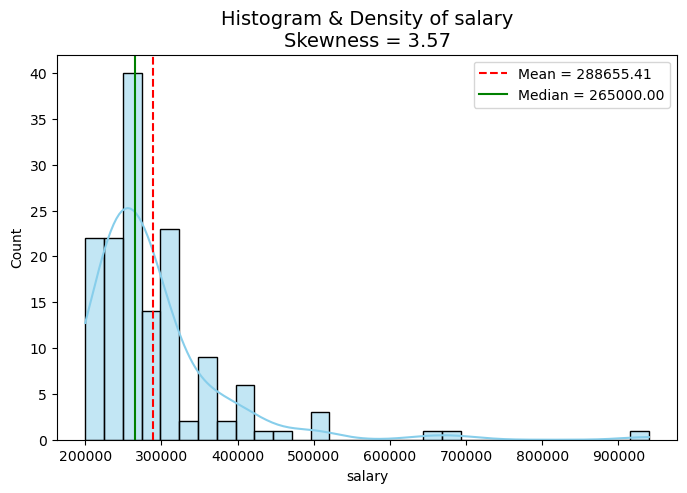

In [74]:
#
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

column = "salary"
s = dataset[column].dropna()

plt.figure(figsize=(8,5))
sns.histplot(s, kde=True, bins=30, color="skyblue", edgecolor="black")

plt.axvline(s.mean(), color='red', linestyle='--', label=f"Mean = {s.mean():.2f}")
plt.axvline(s.median(), color='green', linestyle='-', label=f"Median = {s.median():.2f}")

plt.title(f"Histogram & Density of {column}\nSkewness = {s.skew():.2f}", fontsize=14)
plt.legend()
plt.show()


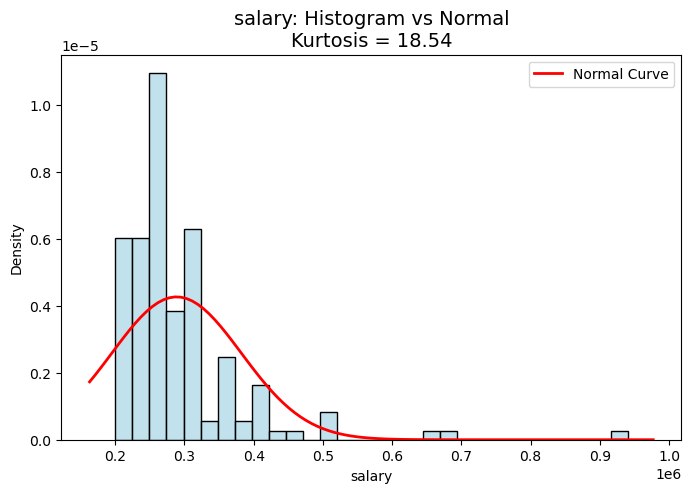

In [73]:
plt.figure(figsize=(8,5))
sns.histplot(s, bins=30, stat="density", color="lightblue", edgecolor="black")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, s.mean(), s.std())
plt.plot(x, p, 'r', linewidth=2, label="Normal Curve")

plt.title(f"{col}: Histogram vs Normal\nKurtosis = {s.kurtosis():.2f}", fontsize=14)
plt.legend()
plt.show()

In [33]:
Lower_Fence=[]
Upper_Fence=[]
for column in quan:
    if univariate[column]["Min"]<univariate[column]["Lower_Fence"]:
       Lower_Fence.append(column)
    if univariate[column]["Max"]>univariate[column]["Upper_Fence"]:
        Upper_Fence.append(column)

In [34]:
Lower_Fence

['hsc_p']

In [35]:
Upper_Fence

['hsc_p', 'degree_p', 'salary']

In [14]:
univariate_df["hsc_p"].value_counts()

hsc_p
65.00    2
42.75    2
91.15    2
66.00    1
63.00    1
73.00    1
61.00    1
12.10    1
91.00    1
Name: count, dtype: int64

In [18]:
dataset["ssc_p"].value_counts().sort_values

<bound method Series.sort_values of ssc_p
62.00    11
63.00    10
67.00     9
73.00     9
52.00     9
         ..
55.68     1
41.00     1
83.33     1
43.00     1
80.60     1
Name: count, Length: 103, dtype: int64>

In [21]:
freqtb=pd.DataFrame(columns=["unique_values","Freq","RFreq","cumsum"])
freqtb

,unique_values,Freq,RFreq,cumsum


In [22]:
freqtb["unique_values"]=dataset["ssc_p"].value_counts().index
freqtb

,unique_values,Freq,RFreq,cumsum
0,62.00,NaN,NaN,NaN
1,63.00,NaN,NaN,NaN
2,67.00,NaN,NaN,NaN
3,73.00,NaN,NaN,NaN
4,52.00,NaN,NaN,NaN
...,...,...,...,...
98,55.68,NaN,NaN,NaN
99,41.00,NaN,NaN,NaN
100,83.33,NaN,NaN,NaN
101,43.00,NaN,NaN,NaN


In [26]:
freqtb["unique_values"]=dataset["ssc_p"].value_counts().index
freqtb["Freq"]=dataset["ssc_p"].value_counts().values
freqtb["RFreq"]=(freqtb["Freq"]/103)
freqtb["cumsum"]=freqtb["RFreq"].cumsum()


In [27]:
freqtb

,unique_values,Freq,RFreq,cumsum
0,62.00,11,0.106796,0.106796
1,63.00,10,0.097087,0.203883
2,67.00,9,0.087379,0.291262
3,73.00,9,0.087379,0.378641
4,52.00,9,0.087379,0.466019
...,...,...,...,...
98,55.68,1,0.009709,2.048544
99,41.00,1,0.009709,2.058252
100,83.33,1,0.009709,2.067961
101,43.00,1,0.009709,2.077670


In [29]:
dataset.columns

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary',
       'gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

In [43]:
import pandas as pd

def freqtb(column, dataset):
    # Get value counts sorted by index (so values are in order)
    freq_series = dataset[column].value_counts().sort_index()

    # Create DataFrame
    freqtb = pd.DataFrame({
        "unique_values": freq_series.index,
        "Freq": freq_series.values
    })

    # Relative frequency
    freqtb["RFreq"] = freqtb["Freq"] / len(dataset)
  # Cumulative relative frequency
    freqtb["CumRFreq"] = freqtb["RFreq"].cumsum()

    return freqtb


In [44]:
 freqtb("hsc_p", dataset)

,unique_values,Freq,RFreq,CumRFreq
0,37.00,1,0.004651,0.004651
1,39.00,1,0.004651,0.009302
2,40.00,1,0.004651,0.013953
3,42.00,1,0.004651,0.018605
4,42.16,1,0.004651,0.023256
...,...,...,...,...
92,90.90,1,0.004651,0.981395
93,91.00,1,0.004651,0.986047
94,92.00,1,0.004651,0.990698
95,97.00,1,0.004651,0.995349


In [40]:
 freqtb("ssc_p", dataset)

,unique_values,Freq,RFreq,CumFreq,CumRFreq
0,40.89,1,0.004651,1,0.004651
1,41.00,1,0.004651,2,0.009302
2,43.00,1,0.004651,3,0.013953
3,44.00,1,0.004651,4,0.018605
4,45.00,1,0.004651,5,0.023256
...,...,...,...,...,...
98,85.80,1,0.004651,209,0.972093
99,86.50,1,0.004651,210,0.976744
100,87.00,3,0.013953,213,0.990698
101,88.00,1,0.004651,214,0.995349


In [2]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("placement_reorder.csv")
from univariate import univariate

In [3]:
dataset.columns

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary',
       'gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

In [4]:
tbl = univariate.freqtb("degree_p", dataset)
print(tbl)

    unique_values  Freq     RFreq  CumFreq  CumRFreq
0            50.0     1  0.004651        1  0.004651
1            50.2     1  0.004651        2  0.009302
2            50.8     1  0.004651        3  0.013953
3            52.0     3  0.013953        6  0.027907
4            53.0     2  0.009302        8  0.037209
..            ...   ...       ...      ...       ...
84           82.0     1  0.004651      211  0.981395
85           83.0     1  0.004651      212  0.986047
86           84.0     1  0.004651      213  0.990698
87           85.0     1  0.004651      214  0.995349
88           91.0     1  0.004651      215  1.000000

[89 rows x 5 columns]


In [63]:
from univariate import univariate  
dataset = pd.read_csv("placement_reorder.csv")
quan, qual = univariate.quanqual(dataset)   
print("Quantitative:", quan)
print("Qualitative:", qual)
tbl = univariate.freqtb("degree_p", dataset)
print(tbl)


Quantitative: ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
Qualitative: ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
    unique_values  Freq     RFreq  CumFreq  CumRFreq
0            50.0     1  0.004651        1  0.004651
1            50.2     1  0.004651        2  0.009302
2            50.8     1  0.004651        3  0.013953
3            52.0     3  0.013953        6  0.027907
4            53.0     2  0.009302        8  0.037209
..            ...   ...       ...      ...       ...
84           82.0     1  0.004651      211  0.981395
85           83.0     1  0.004651      212  0.986047
86           84.0     1  0.004651      213  0.990698
87           85.0     1  0.004651      214  0.995349
88           91.0     1  0.004651      215  1.000000

[89 rows x 5 columns]


In [6]:
 dataset.isnull().sum()

sl_no              0
ssc_p              0
hsc_p              0
degree_p           0
etest_p            0
mba_p              0
salary            67
gender             0
ssc_b              0
hsc_b              0
hsc_s              0
degree_t           0
workex             0
specialisation     0
status             0
dtype: int64

In [7]:
dataset["salary"].fillna(0,inplace=True)
dataset

C:\Users\Nishok\AppData\Local\Temp\ipykernel_26468\1161681324.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["salary"].fillna(0,inplace=True)


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [8]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [23]:
import pandas as pd
from univariate import univariate  
dataset = pd.read_csv("placement_reorder.csv")
quan, qual = univariate.quanqual(dataset)   

In [3]:
quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [24]:
dataset[quan].isnull().sum()

sl_no        0
ssc_p        0
hsc_p        0
degree_p     0
etest_p      0
mba_p        0
salary      67
dtype: int64

In [25]:
from sklearn.impute import SimpleImputer
import numpy as np

In [26]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dataset[quan] = imp_mean.fit_transform(dataset[quan])
dataset[quan].isnull().sum()

sl_no       0
ssc_p       0
hsc_p       0
degree_p    0
etest_p     0
mba_p       0
salary      0
dtype: int64

In [27]:
numerical=dataset[quan]
numerical

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1.00,67.00,91.00,58.00,55.00,58.80,270000.00
1,2.00,79.33,78.33,77.48,86.50,66.28,200000.00
2,3.00,65.00,68.00,64.00,75.00,57.80,250000.00
3,4.00,56.00,52.00,52.00,66.00,59.43,288655.41
4,5.00,85.80,73.60,73.30,96.80,55.50,425000.00
...,...,...,...,...,...,...,...
210,211.00,80.60,82.00,77.60,91.00,74.49,400000.00
211,212.00,58.00,60.00,72.00,74.00,53.62,275000.00
212,213.00,67.00,67.00,73.00,59.00,69.72,295000.00
213,214.00,74.00,66.00,58.00,70.00,60.23,204000.00


In [28]:
categorical=dataset[qual]

In [29]:
frames=[numerical,categorical]
dataset=pd.concat(frames,axis=1)
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.00,67.00,91.00,58.00,55.00,58.80,270000.00,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.00,79.33,78.33,77.48,86.50,66.28,200000.00,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.00,65.00,68.00,64.00,75.00,57.80,250000.00,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.00,56.00,52.00,52.00,66.00,59.43,288655.41,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.00,85.80,73.60,73.30,96.80,55.50,425000.00,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.00,80.60,82.00,77.60,91.00,74.49,400000.00,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.00,58.00,60.00,72.00,74.00,53.62,275000.00,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.00,67.00,67.00,73.00,59.00,69.72,295000.00,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.00,74.00,66.00,58.00,70.00,60.23,204000.00,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [30]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [31]:
dataset.to_csv("preplacement.csv",index=False)